In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
data = pd.read_csv('predict_energy_consumption.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [7]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

C:\Users\RAMAR BOSE\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  
# Mean Squared Error and Mean Absolute Error

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 89266.4688 - mae: 269.3125 - val_loss: 83533.8672 - val_mae: 258.6937
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89945.0234 - mae: 270.4539 - val_loss: 82902.3359 - val_mae: 257.4556
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90818.7578 - mae: 272.8783 - val_loss: 81904.1016 - val_mae: 255.4928
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87120.0234 - mae: 266.2196 - val_loss: 80350.5703 - val_mae: 252.4107
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82504.1094 - mae: 256.9956 - val_loss: 78057.2344 - val_mae: 247.7793
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79045.2188 - mae: 249.6418 - val_loss: 74830.8594 - val_mae: 241.1058
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78225.6016 - mae: 249.7663 - val_loss: 70607.1250 - val_mae: 232.0615
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81395.3281 - mae: 254.6123 - val_loss: 65337.

In [13]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18155.2148 - mae: 115.2842  
Test Mean Absolute Error: 115.36


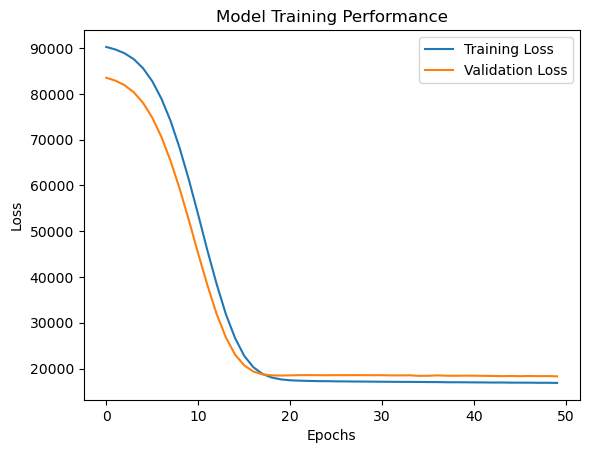

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [15]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[289.5087 ],
       [249.36821],
       [256.65482],
       [209.19081],
       [361.77713],
       [293.78372],
       [330.44122],
       [286.7758 ],
       [285.7585 ],
       [280.69595],
       [231.86331],
       [250.73708],
       [291.16272],
       [231.55371],
       [301.4211 ],
       [309.21936],
       [262.53665],
       [308.34488],
       [302.10764],
       [246.85612],
       [273.6247 ],
       [286.38968],
       [277.55313],
       [279.33914],
       [245.13942],
       [241.08409],
       [261.95837],
       [323.30417],
       [309.2378 ],
       [264.05396],
       [230.15196],
       [288.06552],
       [287.89444],
       [272.28873],
       [318.85587],
       [282.56845],
       [215.29771],
       [253.26848],
       [276.2053 ],
       [244.06752],
       [248.18697],
       [254.70776],
       [252.55244],
       [257.57132],
       [267.98788],
       [253.06398],
       [264.4318 ],
       [248.75488],
       [286.03497],
       [296.8774 ],


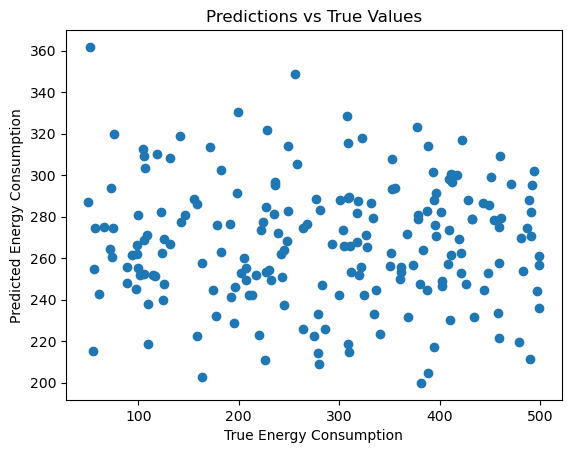

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()